# Power Query: Merge, Append, & UnPivot – 3 Important Transformations

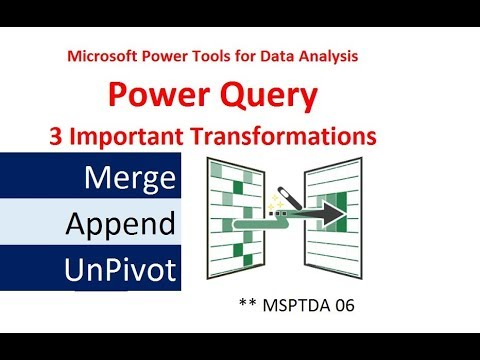

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo(id="8F7v6YvnsiY", width=500, height=300)

**Input data**<br>
Start files for Video/Class Project to download:<br>
https://people.highline.edu/mgirvin/AllClasses/348/MSPTDA/Content/PowerQuery/006-MSPTDA-StartFilePowerQueryMergeAppendUnPivot.xlsx
    
https://people.highline.edu/mgirvin/AllClasses/348/MSPTDA/Content/PowerQuery/006-MSPTDA-dSalesRepTable.xlsx

https://people.highline.edu/mgirvin/AllClasses/348/MSPTDA/Content/PowerQuery/006-MSPTDA-dTerritoryTable.txt
   
Finished files (completed after video done): <br>
https://people.highline.edu/mgirvin/AllClasses/348/MSPTDA/Content/PowerQuery/006-MSPTDA-FinishedFilePowerQueryMergeAppendUnPivot.xlsx

# Alternative Pandas solution

## code

In [2]:
import pandas as pd
import numpy as np
import logging

# (optional) logging
log_fmt = '%(asctime)s %(name)-4s %(levelname)-4s %(funcName)-4s %(message)s'
logging.basicConfig(level=logging.INFO, format=log_fmt, datefmt='%Y-%m-%d %H:%M:%S')
logger = logging.getLogger(__name__)

## merge

In [3]:
f = 'inputs/006-MSPTDA-dSalesRepTable.xlsx'
sales = pd.read_excel(f)
logger.info(sales.shape)
sales.head(4)

2021-02-18 11:35:54 __main__ INFO <module> (134, 4)


,SalesRepID,SalesRepName,HireDate,TerritoryID
0,872-44-12,Sol Marroquin,1994-02-03,NLD
1,872-44-22,Kiera Mcfall,1994-09-10,MEX
2,872-44-32,Raven Beatty,1995-03-19,POL
3,872-44-42,Elinore Dees,1995-06-08,HND


In [4]:
f = 'inputs/006-MSPTDA-dTerritoryTable.txt'
territories = pd.read_csv(f, sep='\t')
logger.info(territories.shape)
territories.head(4)

2021-02-18 11:35:54 __main__ INFO <module> (126, 2)


,TerritoryID,Territory
0,AFG,Afghanistan
1,ALB,Albania
2,APR,Aprine
3,ARE,United Arab Emirates


In [5]:
merge_data = sales.merge(territories, how='left')
logger.info(merge_data.shape)
merge_data.drop(columns='TerritoryID', inplace=True)
merge_data.head(4)

2021-02-18 11:35:54 __main__ INFO <module> (134, 5)


,SalesRepID,SalesRepName,HireDate,Territory
0,872-44-12,Sol Marroquin,1994-02-03,Netherlands
1,872-44-22,Kiera Mcfall,1994-09-10,Mexico
2,872-44-32,Raven Beatty,1995-03-19,Poland
3,872-44-42,Elinore Dees,1995-06-08,Honduras


## append

In [7]:
f = 'inputs/006-MSPTDA-StartFilePowerQueryMergeAppendUnPivot.xlsx'
with pd.ExcelFile(f) as xlsx:
    df_2017 = xlsx.parse(sheet_name='2017')
    df_2018 = xlsx.parse(sheet_name='2018')
    df_2019 = xlsx.parse(sheet_name='2019')

In [8]:
# 2017 - Calculate 'revenue'
df_2017['Revenue'] = df_2017['Units'] * df_2017['NetCostEqivalent'] * df_2017['Price']
df_2017.drop(columns=['Units', 'NetCostEqivalent', 'Price'], inplace=True)
logger.info(df_2017.shape)
df_2017.head(2)

2021-02-18 11:36:27 __main__ INFO <module> (16677, 4)


,Date,Product,Region,Revenue
0,2017-01-01,Fast Catch,East,6333.6
1,2017-01-01,Darnell,South,982.8


In [9]:
logger.info(df_2018.shape)
df_2018.head(2)

2021-02-18 11:36:28 __main__ INFO <module> (19967, 4)


,Date,Product,Region,Revenue
0,2018-01-01,Darnell,South,1965.6
1,2018-01-01,Fast Catch,West,6960.0


In [10]:
df_2019.drop(columns='Color', inplace=True)
logger.info(df_2019.shape)
df_2019.head(2)

2021-02-18 11:36:28 __main__ INFO <module> (25070, 4)


,Date,Product,Region,Revenue
0,2019-01-01,Carlota,South,1482.0
1,2019-01-01,Darnell,East,1411.2


In [11]:
total_sales = pd.concat([df_2017, df_2018, df_2019])
logger.info(total_sales.shape)
total_sales.head(2)

2021-02-18 11:36:29 __main__ INFO <module> (61714, 4)


,Date,Product,Region,Revenue
0,2017-01-01,Fast Catch,East,6333.6
1,2017-01-01,Darnell,South,982.8


## unpivot

In [12]:
f = 'inputs/006-MSPTDA-StartFilePowerQueryMergeAppendUnPivot.xlsx'
unpivot = pd.read_excel(f, sheet_name='UnPivot', header=3)
logger.info(unpivot.shape)
unpivot.drop(columns='Unnamed: 0', inplace=True)
unpivot.head(4)

2021-02-18 11:36:33 __main__ INFO <module> (25, 9)


,Student/Quantitative Class,Busn 216,Busn135,Busn218,BI 348,Math 148,Math 111,Busn 210
0,Abdi Hyde,3.7,3.0,3.9,3.6,2.4,3.0,2.6
1,Tyrone Lord,3.6,3.4,4.0,3.6,3.4,4.0,3.1
2,Tawanda Redmon,3.8,3.5,3.7,3.8,3.8,3.6,3.6
3,Earnestine Graff,3.9,4.0,1.7,2.9,3.1,2.6,3.0


In [13]:
unpivot = unpivot.melt(id_vars='Student/Quantitative Class')
unpivot.columns = ['Student', 'Class', 'Grade']

In [14]:
unpivot.sort_values(['Class', 'Grade'], ascending=[True, False], inplace=True)

In [15]:
unpivot[['Class', 'Student', 'Grade']].head(5)

,Class,Student,Grade
97,BI 348,Gigi Espinal,3.9
77,BI 348,Tawanda Redmon,3.8
75,BI 348,Abdi Hyde,3.6
76,BI 348,Tyrone Lord,3.6
90,BI 348,Delma Fortner,3.5
